## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


## Import dataset

In [2]:
data = pd.read_csv('student_scores.csv')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


##### * Check for the Null values in the data and fill them accordingly.

In [5]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

* No null values found

##### * Plot the Score distribution

C:\Users\91946\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Scores', ylabel='Density'>

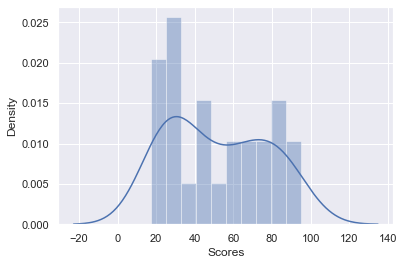

In [6]:
sns.distplot(a=data['Scores'], bins=10)

##### * Prepare data for Training

In [7]:
x = data['Hours']
y = data['Scores']

x_matrix = x.values.reshape(-1,1)
x_matrix.shape

(25, 1)

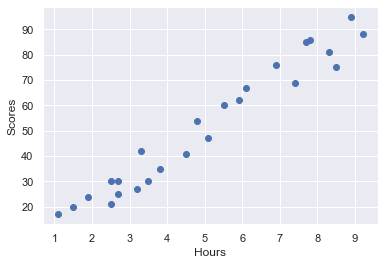

In [8]:
plt.scatter(x,y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

##### * Splitting Data into Training and Testing sets

In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_matrix, y, test_size=0.2, random_state=1)

##### * Train the model

In [10]:
# Standarising the dataset

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [11]:
x_train = scaler.transform(x_train)

##### * Plot the Regression Line

In [12]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression()

In [13]:
reg.coef_

array([24.68971155])

In [14]:
reg.intercept_

53.75

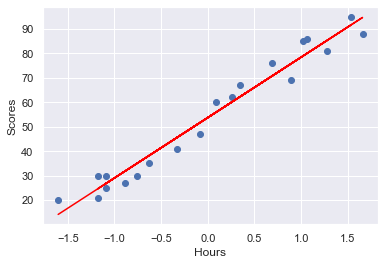

In [15]:
plt.scatter(x_train ,y_train)

yhat = reg.coef_*x_train + reg.intercept_

plt.plot(x_train, yhat, c='red', label ='regression line')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

##### * Calculate the R-squared value for the model.

In [16]:
reg.score(x_train,y_train)

0.9637848283990599